In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.interpolate import lagrange


За каждый пункт домашнего задания можно получить одну из двух оценок $(O_{min},~O_{max})$:
- $O_{min}$ - использованы существующие реализации из *scipy / numpy / sklearn*
- $O_{max}$ - использована собственная реализация + есть сравнение с существующими

Используйте код из ноутбука с семинара 2 и формулы с презентации.


# (2.5 - 3.5) Метод наименьших квадратов

In [ ]:
!gdown 1OkKuyXHnC8-Whlvpve7BjlMiLJ7uHrTx

Downloading...
From: https://drive.google.com/uc?id=1OkKuyXHnC8-Whlvpve7BjlMiLJ7uHrTx
To: /content/Ice Cream Sales - temperatures.csv
100% 3.68k/3.68k [00:00<00:00, 10.2MB/s]


Перед вами - [датасет](https://www.kaggle.com/datasets/raphaelmanayon/temperature-and-ice-cream-sales/data) с зависимостью продаж мороженого от температуры на улицу (в Фаренгейтах). Постройте линейную аппроксимацию данных, применив метод наименьших квадратов.

Визуализируйте результат, построив график зависимости продаж от температуры (*plt.scatter*) и получившееся приближение (*plt.plot*).

**TIP:** в данных есть повторения, поэтому требуется предобработка (для каждой температуры возьмите соответствующее или максимальное, или среднее значение).

## Считывание и предобработка датасета

In [ ]:
df = pd.read_csv('/content/Ice Cream Sales - temperatures.csv')
df

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [ ]:
df.info() # нулевых параметров нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [ ]:
df.nunique() # есть повторения среди Temperature, поэтому для линейной аппроксимации методом наим. квадратов
# возьмем среднюю величину среди Ice Cream Profits для Temperature

Temperature           62
Ice Cream Profits    352
dtype: int64

In [ ]:
df['AVG Profits'] = df.groupby('Temperature')['Ice Cream Profits'].transform('mean')
df

,Temperature,Ice Cream Profits,AVG Profits
0,39,13.17,13.170000
1,40,11.88,11.880000
2,41,18.82,18.820000
3,42,18.65,18.650000
4,43,17.02,16.450000
...,...,...,...
360,99,85.13,87.166667
361,99,87.08,87.166667
362,99,89.29,87.166667
363,101,81.91,83.465000


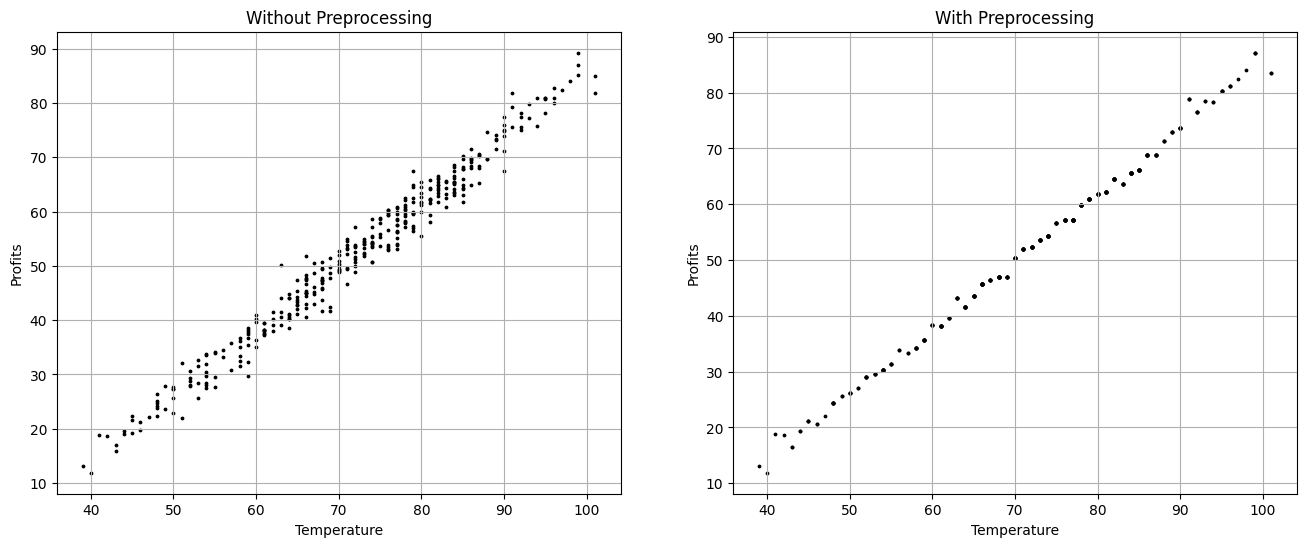

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].scatter(df['Temperature'], df['Ice Cream Profits'], c = 'black' ,s = 3)
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Profits')
axs[0].set_title('Without Preprocessing')
axs[0].grid()

axs[1].scatter(df['Temperature'], df['AVG Profits'], c = 'black', s = 3)
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Profits')
axs[1].set_title('With Preprocessing')
axs[1].grid()
plt.show()

## Аппроксимация ручками, используя формулы из презентации и интернета

In [ ]:
n = len(df)

mx = df['Temperature'].sum() / n
my = df['AVG Profits'].sum() / n
a2 = np.dot(df['Temperature'].T, df['Temperature']) / n # тут векторно умножили, чтобы циклы обойти (считает быстрее)
a11 = np.dot(df['Temperature'].T, df['AVG Profits']) / n # тут векторно умножили, чтобы циклы обойти (считает быстрее)

k = (a11 - mx * my) / (a2 - mx ** 2)
b = my - k * mx

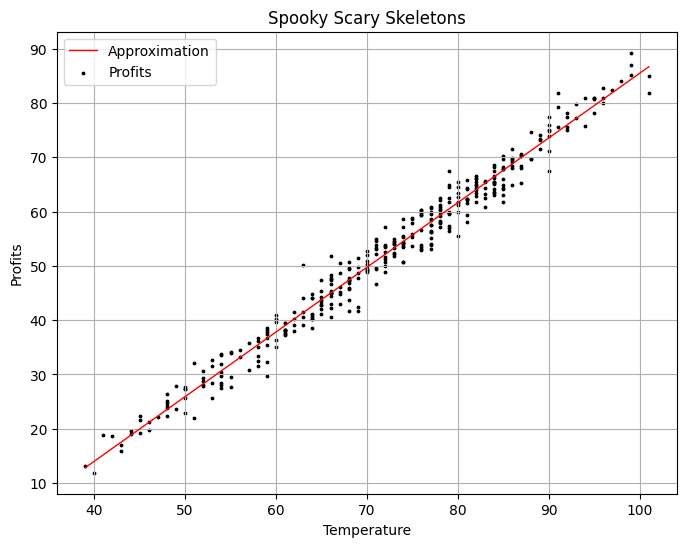

In [ ]:
plt.figure(figsize=(8, 6))
plt.grid(1)
plt.plot(df['Temperature'], k * df['Temperature'] + b, label = 'Approximation', linewidth = 1, c = 'red')
plt.scatter(df['Temperature'], df['Ice Cream Profits'], label = 'Profits', c = 'black', s = 3)
plt.xlabel('Temperature')
plt.ylabel('Profits')
plt.title('Spooky Scary Skeletons')
plt.legend()
plt.show()

## Сравнение нашей аппроксимации с аппроксимацией через numpy и функцию polyfit

Фунция polyfit ищет коэффициенты многочлена, в нашем случае многочлен первой степени, т.к. нам необходима линейная регрессия

(т.к. аппроксимации совпадут, то одну из них я сделаю толще для наглядности)


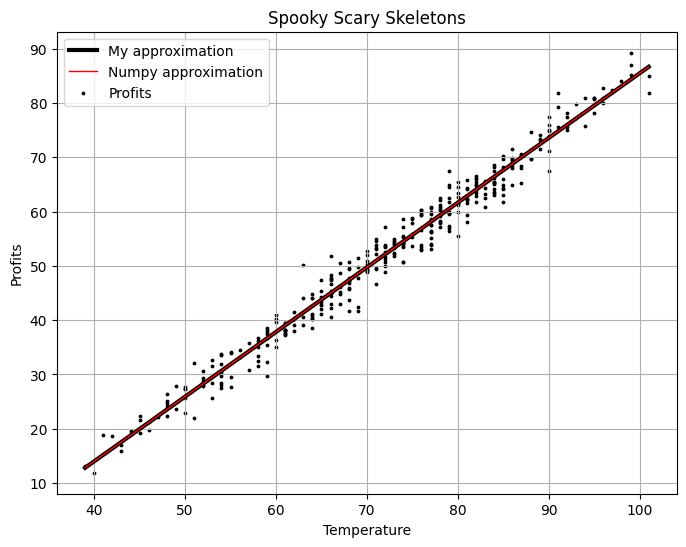

In [ ]:
coeffs = np.polyfit(df['Temperature'], df['AVG Profits'], 1)
plt.figure(figsize=(8, 6))
plt.grid(1)
plt.plot(df['Temperature'], k * df['Temperature'] + b, label = 'My approximation', linewidth = 3, c = 'black')
plt.plot(df['Temperature'], coeffs[0] * df['Temperature'] + coeffs[1], label = 'Numpy approximation', linewidth = 1, c = 'red')
plt.scatter(df['Temperature'], df['Ice Cream Profits'], label = 'Profits', c = 'black', s = 3)
plt.xlabel('Temperature')
plt.ylabel('Profits')
plt.title('Spooky Scary Skeletons')
plt.legend()
plt.show()

# (2.5-3.5) Псевдообратная матрица

In [ ]:
!gdown 1pVI_yi7AKfsudZl6VG4ZwA-8mfx0Gg3q

Downloading...
From: https://drive.google.com/uc?id=1pVI_yi7AKfsudZl6VG4ZwA-8mfx0Gg3q
To: /content/Student_Performance.csv
100% 175k/175k [00:00<00:00, 21.4MB/s]


Другой [датасет](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) - об успеваемости студентов. Попробуйте предобработать данные (перевести категориальные переменные в числовые) и построить псевдообратную матрицу для линейной аппроксимации, а затем решить систему уравнений $AX=\mathcal{B}$ и найти ее псевдорешение.

Также решение можно проверять на датасете из предыдущего пункта.

## Считывание и предобработка датасета

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')
df = df.drop_duplicates()
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info() # нулевых параметров нет

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


X - DataFrame с замененным последним столбцом (столбец, который мы хотим предсказать, заменили на столбец, который в будущем будет отвечать за свободный коэфициент линейной регрессии)

Y - столбец, который мы хотим предсказать

In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
Y = df['Performance Index']
X = df.drop('Performance Index', axis = 1)
X['new coeff'] = [1 for i in range(len(df))]
X

NameError: name 'df' is not defined

Разделили датасет на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

## Реализация метода псевдообратной матрицы

Считаем псевдообратную матрицу и находим коэффициенты линейной регрессии

In [ ]:
A = X_train.values
A = np.matrix(A)
A_plus = np.linalg.inv((A.T @ A)) @ A.T
print('Псевдообратная матрица:\n', A_plus, '\n')
X = A_plus @ y_train
print('Коэффициенты линейной регресии:\n', X)

Псевдообратная матрица:
 [[ 7.49117573e-05  5.77423990e-05 -3.65651306e-05 ... -7.50881401e-05
   3.80996863e-05  2.07394338e-05]
 [-3.27216773e-06  1.25671574e-06  7.46538402e-06 ... -7.96834488e-06
   9.26269140e-06  9.27174111e-06]
 [-2.57364234e-04 -2.44738437e-04 -2.52242586e-04 ...  2.64033160e-04
  -2.61689205e-04  2.64846538e-04]
 [-1.13118756e-04  1.97103449e-05 -2.46331574e-05 ... -6.42070331e-05
  -6.99212728e-05  1.10066456e-04]
 [ 5.28613334e-05 -4.02774925e-05 -2.33174497e-05 ... -3.90181278e-05
   3.75471374e-05 -7.24844025e-05]
 [ 6.02477433e-04 -7.28959025e-05  1.81175552e-04 ...  1.52410874e-03
  -2.95085338e-04 -1.13714621e-03]] 

Коэффициенты линейной регресии:
 [  2.85676362   1.01922122   0.63919831   0.48577052   0.18839425
 -34.1772161 ]


In [ ]:
pred = X_test @ X.T
compare = pd.DataFrame({'Performance Index':y_test,'Predictions':pred})
compare

,Performance Index,Predictions
8961,53.0,52.634916
3185,62.0,62.703297
1923,63.0,64.049464
1336,68.0,67.874438
3732,32.0,32.903087
...,...,...
4136,60.0,61.123398
5599,66.0,66.488383
7679,33.0,31.025812
3204,40.0,41.894196


In [ ]:
print('MAE = ', mean_absolute_error(y_test,pred))
print('MSE = ', mean_squared_error(y_test,pred))
r2_score(y_test, pred)

MAE =  1.6248012415754622
MSE =  4.180674372547097


0.9883861348563292

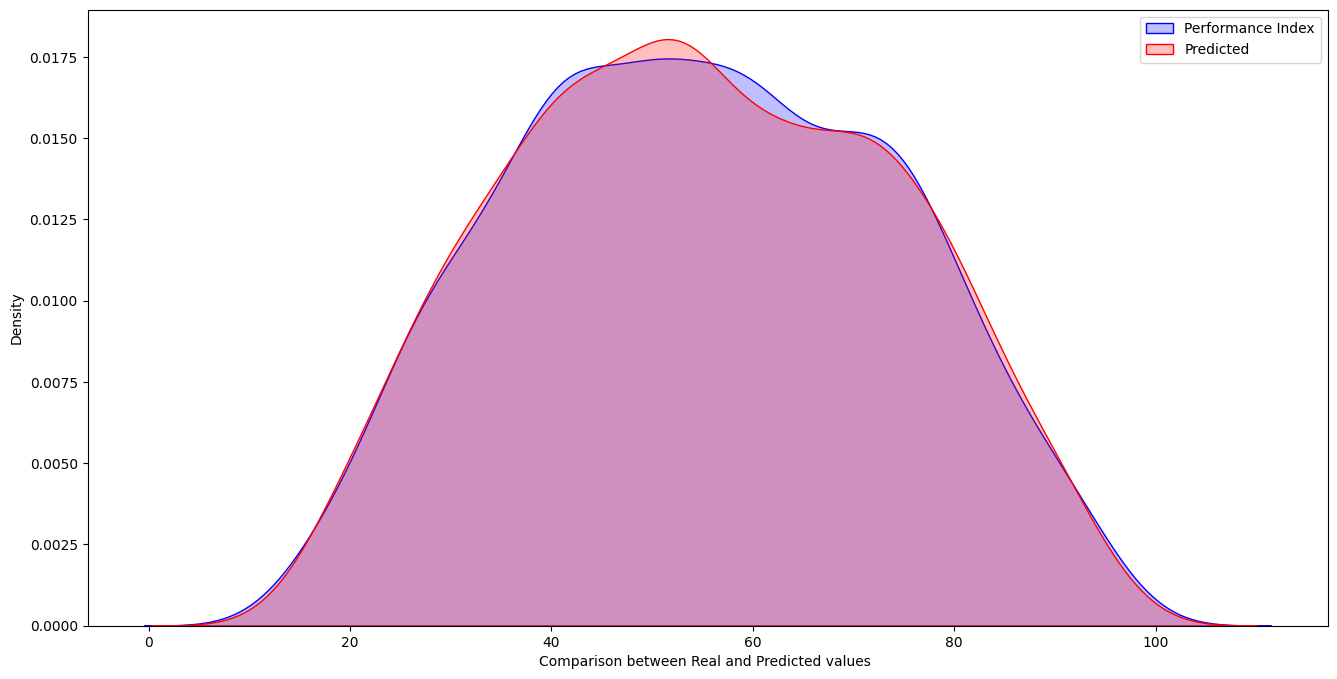

In [ ]:
plt.figure(figsize=(16, 8))
plt.xlabel('Comparison between Real and Predicted values ')
sns.kdeplot(compare['Performance Index'], fill=True, color='blue')
sns.kdeplot(compare['Predictions'], color='red', fill=True)
plt.legend(labels = ['Performance Index','Predicted'])
plt.show()

## Используем готовую функцию линейной регрессии из sklearn

In [ ]:
df = pd.read_csv('/content/Student_Performance.csv')
df = df.drop_duplicates()

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
Y = df['Performance Index']
X = df.drop('Performance Index', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
compare = pd.DataFrame({'Performance Index':y_test,'Predictions':pred})
compare


,Performance Index,Predictions
8961,53.0,52.634916
3185,62.0,62.703297
1923,63.0,64.049464
1336,68.0,67.874438
3732,32.0,32.903087
...,...,...
4136,60.0,61.123398
5599,66.0,66.488383
7679,33.0,31.025812
3204,40.0,41.894196


In [ ]:
print('MAE = ', mean_absolute_error(y_test,pred))
print('MSE = ', mean_squared_error(y_test,pred))
r2_score(y_test, pred)

MAE =  1.62480124157546
MSE =  4.180674372547104


0.9883861348563292

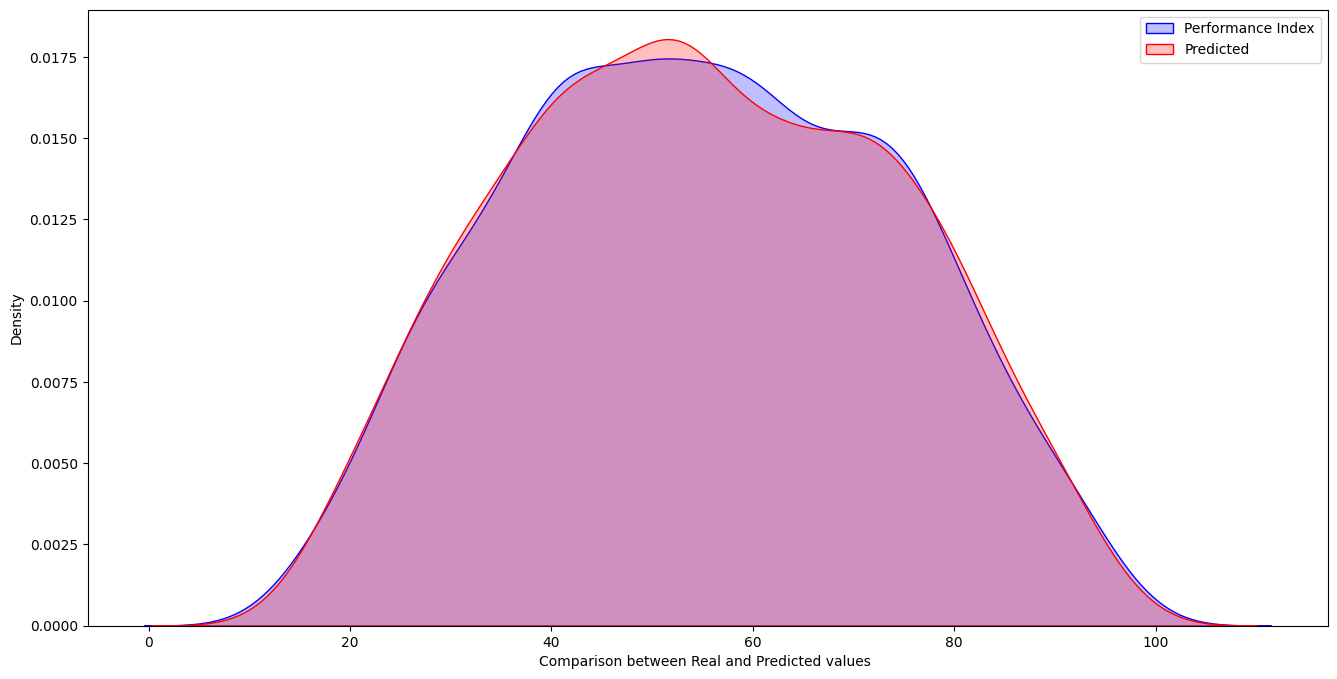

In [ ]:
plt.figure(figsize=(16, 8))
plt.xlabel('Comparison between Real and Predicted values ')
sns.kdeplot(compare['Performance Index'], fill=True, color='blue')
sns.kdeplot(compare['Predictions'], color='red', fill=True)
plt.legend(labels = ['Performance Index','Predicted'])
plt.show()

# (2 - 3) Полином Лагранжа

Данные - зависимость доходности некоторой облигации от ее срока погашения. Нужно построить полином Лагранжа и оценить значение доходности облигации в пропущенные в данных года (**4, 6, 8, 9 лет**)


In [ ]:
# Sample data for the yield curve

maturities = np.array(
    [1, 2, 3, 5, 7, 10]
)  # Maturities in years

interest_rates = np.array(
    [0.02, 0.025, 0.03, 0.035, 0.04, 0.045]
)  # Corresponding interest rates

## Реализация нашего полинома Лагранжа ручками

In [ ]:
def my_lagrange(x_values, y_values):
  lagr_poly = np.poly1d([0])
  n = len(x_values)
  l = [np.poly1d([y_values[i]]) for i in range(n)]
  for i in range(n):
    for j in range(n):
      if i == j: continue
      else:
        l[i] = np.polymul(l[i], np.poly1d([1, -x_values[j]]) / (x_values[i] - x_values[j]))
  for i in l:
    lagr_poly = np.polyadd(lagr_poly, i)
  return lagr_poly

In [ ]:
print(my_lagrange(maturities, interest_rates))

           5             4            3           2
-9.59e-06 x + 0.0002351 x - 0.002027 x + 0.00715 x - 0.005487 x + 0.02014


## Сравнение нашего Лагранжа с уже готовым и оценка в пропущенные года

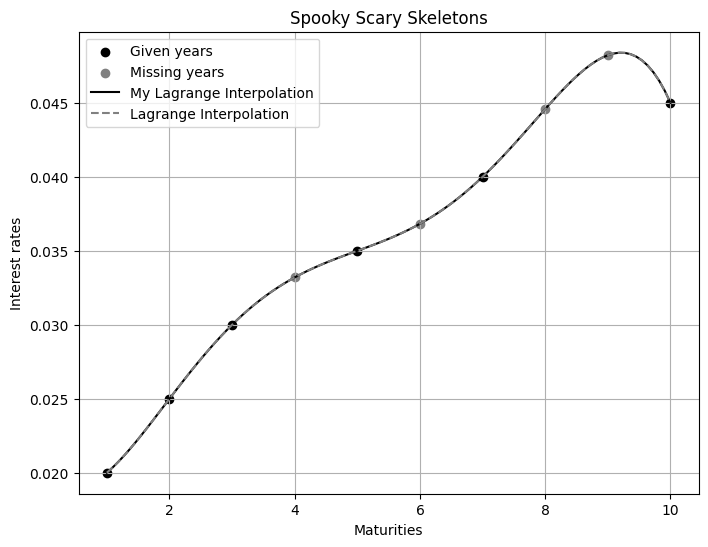

In [ ]:
x_years = np.linspace(1, 10, 100)
missing_years = [4, 6, 8, 9]

lagrange_poly = my_lagrange(maturities, interest_rates)
lagrange_poly1 = lagrange(maturities, interest_rates)

plt.figure(figsize=(8, 6))
plt.grid(1)
plt.scatter(maturities, interest_rates, label='Given years', c = 'black')
plt.scatter(missing_years, lagrange_poly(missing_years), label='Missing years', c="grey")
plt.plot(x_years, lagrange_poly(x_years), c="black", label="My Lagrange Interpolation")
plt.plot(x_years, lagrange_poly1(x_years), c="grey", label="Lagrange Interpolation", linestyle='--')
plt.xlabel('Maturities')
plt.ylabel('Interest rates')
plt.title('Spooky Scary Skeletons')
plt.legend()
plt.show()


In [ ]:
for i in range(len(missing_years)):
  print(f'Доходность в {missing_years[i]} год = {lagrange_poly(missing_years)[i]}')

Доходность в 4 год = 0.03320238095238148
Доходность в 6 год = 0.03682539682539876
Доходность в 8 год = 0.044583333333338526
Доходность в 9 год = 0.04822222222223004
